# Sentinel-2 Image Segmentation and Land Cover Classification using NDVI

## 1. Importing the necessary libraries

This labraries are the same used on the obia_routine.py file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage import segmentation, measure, filters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import rasterio
from rasterio.plot import show

It is also important to import the python file itself, specifying which functions within the file to import

In [2]:
from obia_routine import load_image, image_segmentation, calculate_ndvi, classify_land_cover, visualization

## 2. Defining which image from the _data folder are we using

In [16]:
image_path = r'_data\S2_RGB_NIR_202406_4.tif'

## 3. Load the image using the load_image function

In [17]:
load_image(image_path)

Loaded Sentinel-2 image with bands: ['B4', 'B3', 'B2', 'B8']
Image shape: (1687, 1702, 4)


(array([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         

**(for the next functions we will only need the first part of the load_image return function, which means, the image array)**

In [18]:
image = load_image(image_path)[0]

Loaded Sentinel-2 image with bands: ['B4', 'B3', 'B2', 'B8']
Image shape: (1687, 1702, 4)


## 4. Segmentate the image using the image_segmentation function

In [19]:
image_segmentation(image, n_segments=2000, compactness=1, sigma=3)

Segmentation complete: 1210 segments created


(array([[   1,    1,    1, ...,   17,   17,   17],
        [   1,    1,    1, ...,   17,   17,   17],
        [   1,    1,    1, ...,   17,   17,   17],
        ...,
        [1195, 1195, 1195, ..., 1190, 1190, 1190],
        [1195, 1195, 1195, ..., 1190, 1190, 1190],
        [1195, 1195, 1195, ..., 1190, 1190, 1190]]),
 1210)

**(for the next functions we will only need the first part of the image_segmentation return function, which means, the segments)**

In [20]:
segments = image_segmentation(image, n_segments=2000, compactness=1, sigma=3)[0]

Segmentation complete: 1329 segments created


## 5. Calculate NDVI using the calculate_ndvi function

In [21]:
calculate_ndvi(image, red_band_idx=0, nir_band_idx=3)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
ndvi = calculate_ndvi(image, red_band_idx=0, nir_band_idx=3)

## 6. Classification using the classify_land_cover function

In [23]:
#classify_land_cover(image, segments, vegetation_threshold=0.1, water_threshold=0.05, red_band_idx=0, nir_band_idx=3, use_ndvi=True)

**(for the next functions we will only need the first part of the classify_land_cover return function, which means, the classification)**

In [24]:
classification = classify_land_cover(image, segments, vegetation_threshold=0.1, water_threshold=0.05, 
                       red_band_idx=0, nir_band_idx=3, use_ndvi=True)[0]

Using NDVI with Red band 0 (B4) and NIR band 3 (B8)
Classification complete:
  Vegetation: 90.0%
  Water: 10.0%
  Other: 0.1%
  NDVI range: -1.000 to 0.845
  Mean NDVI: 0.441


## 7. Visualization using the visualization function

(<Figure size 1500x1000 with 5 Axes>,
 array([[<Axes: title={'center': 'Original Sentinel-2 Image (RGB: B4,B3,B2)'}>,
         <Axes: title={'center': 'Image Segmentation (1329 segments)'}>],
        [<Axes: title={'center': 'Land Cover Classification'}>,
         <Axes: title={'center': 'Classification Overlay'}>]], dtype=object))

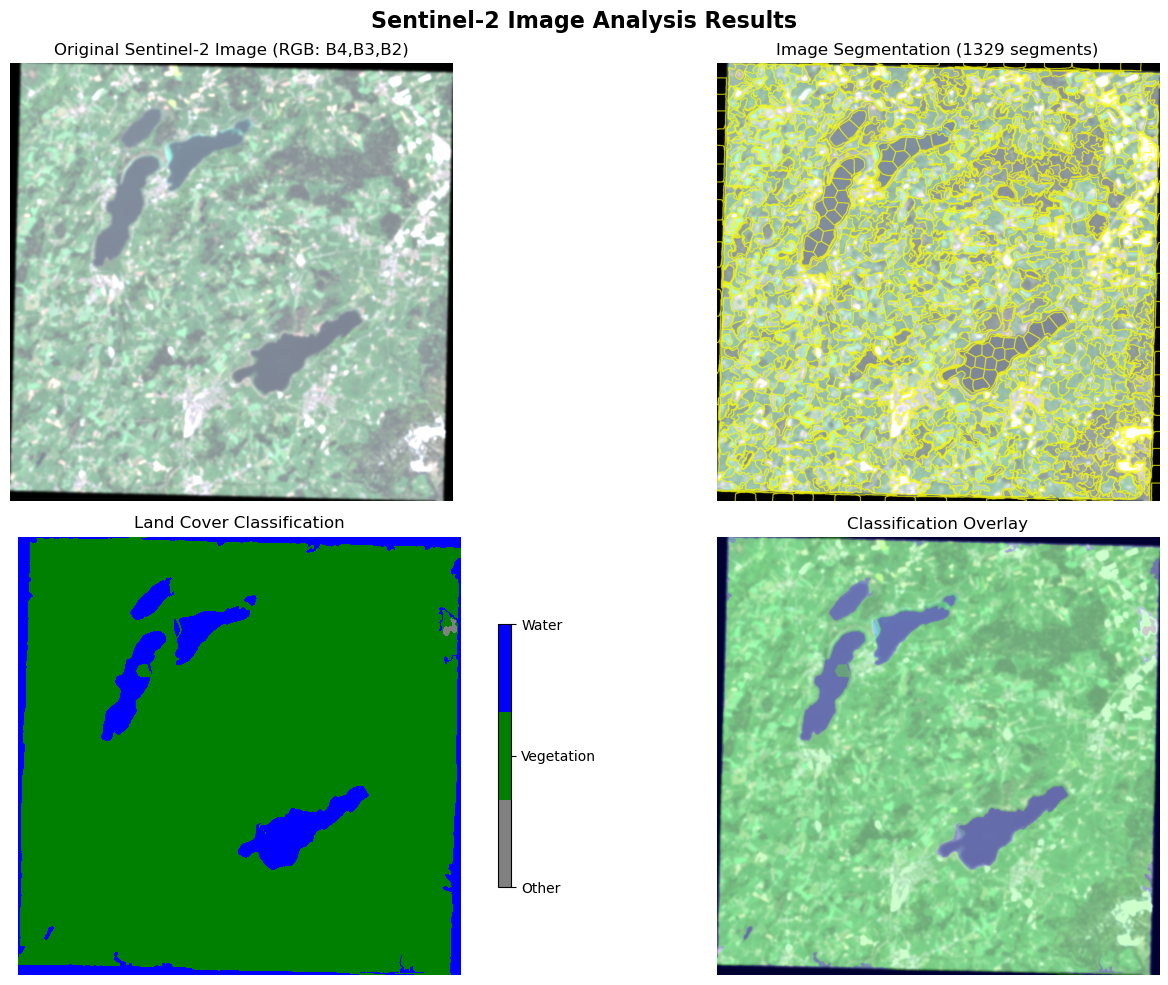

In [25]:
visualization(image, segments, classification, figsize=(15, 10))